In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from llm_answerer import LLM_TYPE_GPT, LLM_TYPE_LLAMA, LLM_TYPE_VICUNA, LLM_TYPE_COHERE

REPORT_FILE_PATH = Path('../llm-answer-results/reports')
sns.set_theme()

/home/rehoumir/.cache/pypoetry/virtualenvs/robojudge-dcfHlt3M-py3.10/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_reports(type='llm_auto'):
    overall_df = None

    for llm_type in [LLM_TYPE_GPT, LLM_TYPE_LLAMA, LLM_TYPE_VICUNA, LLM_TYPE_COHERE]:
        df = pd.read_csv(REPORT_FILE_PATH / '2023-10-18' / f'{llm_type}_{type}_score.csv')
        df['llm_type'] = llm_type
        df['question_id'] = df.index
        if overall_df is None:
            overall_df = df
        else:
            overall_df = pd.concat([overall_df, df])

    overall_df = overall_df.reset_index()

    return overall_df

In [3]:
auto_df = load_reports()

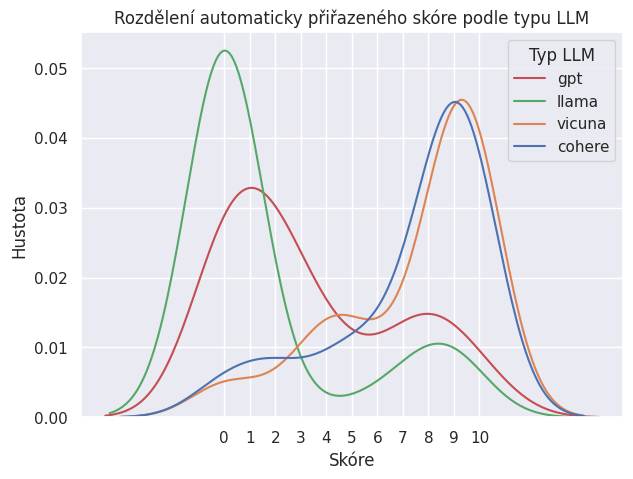

In [26]:
f, ax = plt.subplots(figsize=(7, 5))
# sns.despine(f)

ax.set_xticks(range(11))
ax.set_xlabel('Skóre')
ax.set_ylabel('Hustota')
g =sns.kdeplot(auto_df, x='score', hue='llm_type').set_title('Rozdělení automaticky přiřazeného skóre podle typu LLM').set
plt.legend(title='Typ LLM', labels=auto_df['llm_type'].unique())
plt.show(g)

In [6]:
auto_df.groupby('llm_type')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
llm_type,,,,,,,,
cohere,50.0,3.38,3.398019,0.0,0.0,2.0,7.00,10.0
gpt,50.0,7.34,2.987115,0.0,5.5,9.0,9.00,10.0
llama,50.0,7.48,2.964002,0.0,5.0,9.0,9.75,10.0
vicuna,50.0,1.64,3.274889,0.0,0.0,0.0,0.00,9.0


In [7]:
auto_df.groupby('llm_type')['score'].median()

llm_type
cohere    2.0
gpt       9.0
llama     9.0
vicuna    0.0
Name: score, dtype: float64

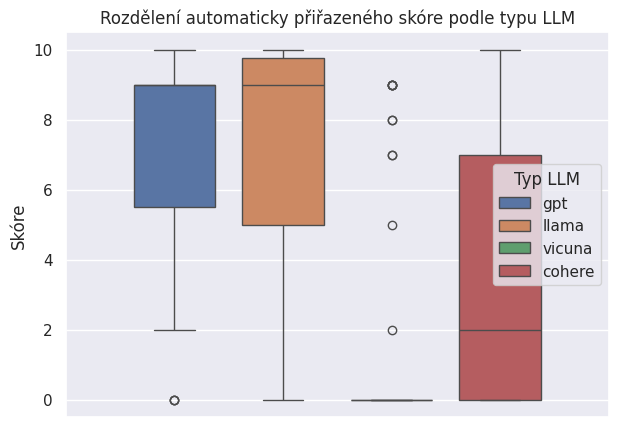

In [35]:
f, ax = plt.subplots(figsize=(7, 5))

sns.boxplot(data=auto_df, y='score', hue='llm_type', width=0.8, gap=0.25).set_title('Rozdělení automaticky přiřazeného skóre podle typu LLM')

ax.set_ylabel('Skóre')
plt.legend(title='Typ LLM')
plt.show(g)

In [9]:
score_by_question = auto_df.groupby('question_id').aggregate({'score': np.sum, 'question': lambda x: x})

score_by_question = score_by_question.sort_values('score')

score_by_question.to_csv('../llm-answer-results/figures/score_by_question.csv')

/tmp/ipykernel_727/2050241137.py:1: FutureWarning: The provided callable <function sum at 0x7fcd40581750> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  score_by_question = auto_df.groupby('question_id').aggregate({'score': np.sum, 'question': lambda x: x})


In [10]:
bert_overall_df = load_reports(type='bert')

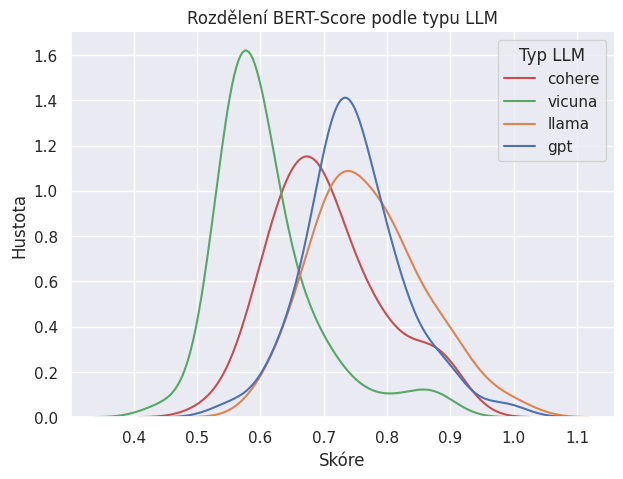

In [43]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

ax.set_xlabel('Skóre')
ax.set_ylabel('Hustota')

sns.kdeplot(bert_overall_df, x='score', hue='llm_type').set_title('Rozdělení BERT-Score podle typu LLM')
plt.legend(title='Typ LLM', labels=['cohere', 'vicuna', 'llama', 'gpt'])
plt.show(g)

In [12]:
bert_overall_df.groupby('llm_type')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
llm_type,,,,,,,,
cohere,50.0,0.705590,0.088303,0.528759,0.641635,0.688895,0.752080,0.904030
gpt,50.0,0.748921,0.077664,0.555620,0.705268,0.736102,0.789416,0.984493
llama,50.0,0.770814,0.086373,0.608374,0.715692,0.755372,0.822560,1.000000
vicuna,50.0,0.610236,0.081791,0.452058,0.562228,0.585067,0.629456,0.877847


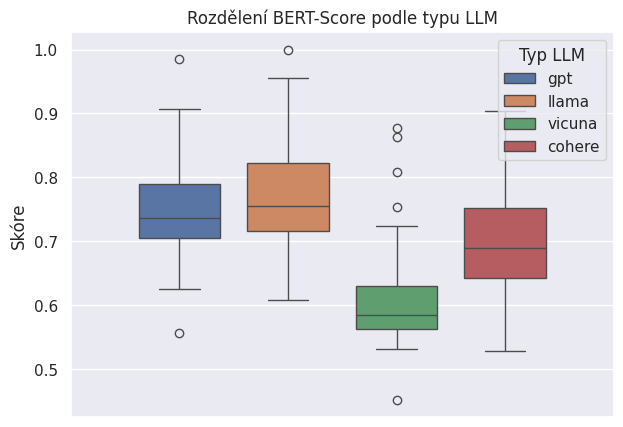

In [49]:
f, ax = plt.subplots(figsize=(7, 5))

ax.set_ylabel('Skóre')

# sns.kdeplot(bert_overall_df, x='score', hue='llm_type').set_title('Rozdělení BERT-Score podle typu LLM')


sns.boxplot(data=bert_overall_df, y='score', hue='llm_type', width=0.8, gap=0.25).set_title('Rozdělení BERT-Score podle typu LLM')
plt.legend(title='Typ LLM', loc='upper right')
plt.show(g)